In [2]:
%reset -f
import pyvisa as visa
import numpy as np
import sys
import matplotlib.pyplot as plt

In [3]:
#connect to scope
try:
    VISA_ADDRESS = 'USB0::0x0957::0x1790::MY58031279::0::INSTR' #VISA address goes here, can be obtained from IO Libraries
    # Connection Expert or by using the scope panel: utilities -> configure LAN -> USB VISA Address 
    rm = visa.ResourceManager()
    scope = rm.open_resource(VISA_ADDRESS)
    print(scope.query('*IDN?'))
    
except Exception:
    print("Unable to connect to oscilloscope at " + str(VISA_ADDRESS) + ". Aborting script.")
    sys.exit()

AGILENT TECHNOLOGIES,MSO-X 6004A,MY58031279,07.30.2019051434



In [4]:
# Clear the status data structures, the device-defined error queue, and the Request-for-OPC flag
scope.write('*CLS')

6

ask adam what is this output of "6"

In [9]:
scope.write(":FRANalysis:FREQuency:MODE SINGle")
scope.query(":FRANalysis:DATA?")

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

why is it saying amplitud = 30/31 when it should be 100m


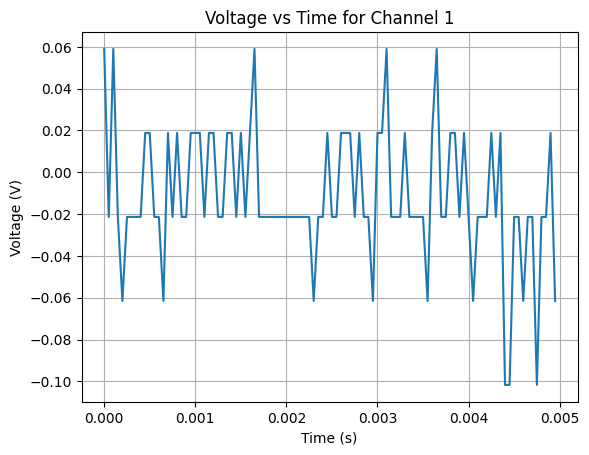

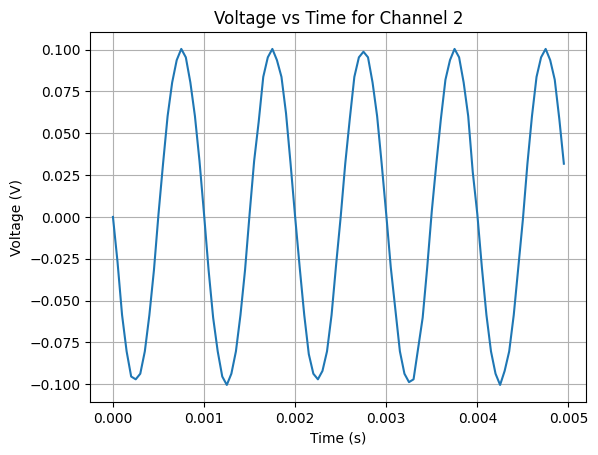

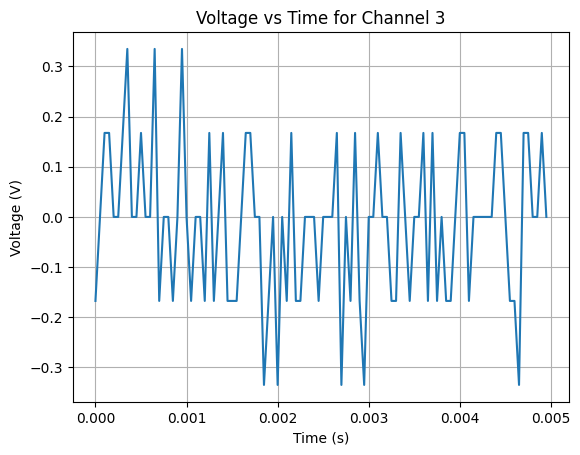

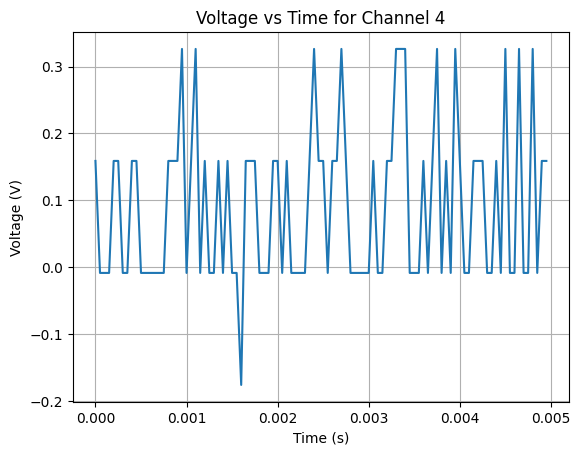

In [24]:
def voltage_vs_time(ch_num):
    '''Acquire data from a given scope's channel, returning a time and voltage array for that trigger.'''
    try:
        # Clear the status data structures, the device-defined error queue, and the Request-for-OPC flag
        scope.write('*CLS')

        scope.write(":ACQuire:TYPE NORMal")
        scope.write(":TIMebase:MODE MAIN")
        scope.write(":WAVeform:SOURce CHANnel{}".format(ch_num))
        scope.write(":WAVeform:FORMat WORD")
        scope.write(":WAVeform:POINts 100")

        scope.write(":SINGle")
        preamble = scope.query(':WAVeform:PREamble?').split(',')
        values = scope.query_binary_values(':WAVeform:DATA?', datatype='h', container=np.array)

        num_samples = int(preamble[2])

        x_increment, x_origin, x_reference = float(preamble[4]), 0, float(preamble[6])
        time = np.array([(np.arange(num_samples)-x_reference)*x_increment + x_origin]) # compute x-values
        time = time.T # make x values vertical

        y_increment, y_origin, y_reference = float(preamble[7]), float(preamble[8]), float(preamble[9])
        voltage = (values-y_reference)*y_increment + y_origin

        return time, voltage

    except Exception as e:
        print(e)


for i in range(4):
    ch_num = i
    t, v = voltage_vs_time(i+1)
    plt.plot(t, v)
    plt.title("Voltage vs Time for Channel " + str(i+1))
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.grid()
    plt.ylim()
    plt.show()

AGILENT TECHNOLOGIES,MSO-X 6004A,MY58031279,07.30.2019051434



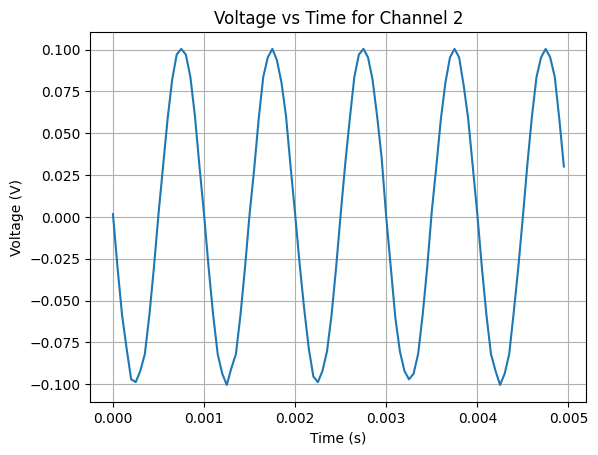

In [29]:
def voltage_vs_time(chan_num):
    try:
        print(scope.query('*IDN?'))
        scope.write('*CLS')

        scope.write(":ACQuire:TYPE NORMal")
        scope.write(":TIMebase:MODE MAIN")
        scope.write(":WAVeform:SOURce CHANnel{}".format(chan_num))
        scope.write(":WAVeform:FORMat WORD")
        scope.write(":WAVeform:POINts 100")

        scope.write(":SINGle")
        preamble = scope.query(':WAVeform:PREamble?').split(',')
        values = scope.query_binary_values(':WAVeform:DATA?', datatype='h', container=np.array)
        
        preamble = scope.query(":WAVeform:PREamble?").split(',')
        data_raw = scope.query_binary_values(':WAVeform:DATA?', datatype='h', container=np.array)
        #data_list = data_raw.split(",")
        #data = np.array(data_list, dtype=float)
        

        num_samples = int(preamble[2])


        x_increment = float(preamble[4])
        x_origin = 0
        x_reference = float(preamble[6])
        time = np.array([(np.arange(num_samples)-x_reference)*x_increment + x_origin]) # compute x-values
        time = time.T # make x values vertical
        
        
        y_increment = float(preamble[7])
        y_origin = float(preamble[8])
        y_reference = float(preamble[9])
        voltage = (values-y_reference)*y_increment + y_origin
        
        
        return time, voltage
        
    except Exception as e:
        print(e)
    
#for i in range(3):
ch_number = "2"
t, V = voltage_vs_time(2)

plt.plot(t, V)
plt.title("Voltage vs Time for Channel " + str(2))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid()
plt.ylim()
plt.show()

In [ ]:
scope.write(":WAVeform:SOURce CHANnel2")
scope.write("WAVeform:FORMat ASCii")
scope.write(":SINGle")
scope.query(":WAVeform:FORMat?")
scope.write(":WAVeform:POINts 100")
preamble = scope.query(':WAVeform:PREamble?')
preamble = preamble.split(',')
values = scope.query_binary_values(':WAVeform:DATA?', datatype='h', container=np.array)
data_raw = scope.write(":WAVeform:DATA?") #request data from scope
#data_list = data_raw.split(",")
#data = np.array(data_list, dtype=float)
print(data_raw)

In [ ]:
scope.write("WAVeform:PREamble?")